We will use the daily spreadsheet from EU CDC containing new cases and deaths per country per day.

In [11]:
!wget -N https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx

--2020-05-14 14:13:19--  https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx
Resolving www.ecdc.europa.eu (www.ecdc.europa.eu)... 13.227.223.117, 13.227.223.78, 13.227.223.89, ...
Connecting to www.ecdc.europa.eu (www.ecdc.europa.eu)|13.227.223.117|:443... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘COVID-19-geographic-disbtribution-worldwide.xlsx’ not modified on server. Omitting download.



Get Pandas and NumPy for feature engineering and calculations and get plots inline.

In [12]:
import pandas as pd
import numpy  as np

%matplotlib inline

We read our dataframe directly from the downloaded Excel file and have a look at the first 10 lines for format. Data for Namibia caused missing values because the `geoId` is __NA__, so we disable interpretation of missing values.

In [13]:
df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx', keep_default_na=False, na_values='')
df.head(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,2020-05-14,14,5,2020,259,3,Afghanistan,AF,AFG,37172386.0,Asia
1,2020-05-13,13,5,2020,280,5,Afghanistan,AF,AFG,37172386.0,Asia
2,2020-05-12,12,5,2020,285,2,Afghanistan,AF,AFG,37172386.0,Asia
3,2020-05-11,11,5,2020,369,5,Afghanistan,AF,AFG,37172386.0,Asia
4,2020-05-10,10,5,2020,255,6,Afghanistan,AF,AFG,37172386.0,Asia
5,2020-05-09,9,5,2020,215,3,Afghanistan,AF,AFG,37172386.0,Asia
6,2020-05-08,8,5,2020,171,2,Afghanistan,AF,AFG,37172386.0,Asia
7,2020-05-07,7,5,2020,168,9,Afghanistan,AF,AFG,37172386.0,Asia
8,2020-05-06,6,5,2020,330,5,Afghanistan,AF,AFG,37172386.0,Asia
9,2020-05-05,5,5,2020,190,5,Afghanistan,AF,AFG,37172386.0,Asia


To make room in the dataframe for future predictions, we add columns for those values and set them to missing for now.

In [14]:
df['pcases']  = np.nan
df['pdeaths'] = np.nan

Last check of our source dataframe.

In [15]:
df.count()

dateRep                    16949
day                        16949
month                      16949
year                       16949
cases                      16949
deaths                     16949
countriesAndTerritories    16949
geoId                      16949
countryterritoryCode       16797
popData2018                16743
continentExp               16949
pcases                         0
pdeaths                        0
dtype: int64

We pivot to a country by column format.

In [16]:
df_geo = df.pivot(index='dateRep', columns='geoId', values=['cases', 'deaths', 'pcases', 'pdeaths'])
df_geo

cases                                                         ...  \
geoId         AD     AE     AF   AG   AI    AL     AM   AO     AR    AT  ...   
dateRep                                                                  ...   
2019-12-31   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-01   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-02   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-03   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-04   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
...          ...    ...    ...  ...  ...   ...    ...  ...    ...   ...  ...   
2020-05-10   2.0  624.0  255.0  0.0  0.0   6.0  146.0  0.0  165.0  42.0  ...   
2020-05-11   1.0  781.0  369.0  0.0  0.0  12.0  138.0  2.0   13.0  10.0  ...   
2020-05-12   1.0  680.0  285.0  0.0  0.0   4.0   79.0  0.0  245.0  87.0  ...   
2020-05-13   2.0  783.0  280.0  0.0  0.0   4.0  146.0  0.0  529.0  36.0  ...   
2020-05-14   2.0  725.0  259.0  0.0  0.0   4.0  180.0  0.0  316.0  54.0  ...   

           pdeaths                                      
geoId           VC  VE  VG  VI  VN  XK  YE  ZA  ZM  ZW  
dateRep                                                 
2019-12-31     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-01-01     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-01-02     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-01-03     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-01-04     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
...            ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  
2020-05-10     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-05-11     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-05-12     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-05-13     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-05-14     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  

[136 rows x 836 columns]

For predictions later on we need extra rows in our dataframe. One of the ways to do that is reindexing with a larger range, so we use the current range and add six months and check our latest date.

In [17]:
new_index = pd.date_range(df_geo.index.min(), df_geo.index.max() + pd.Timedelta('183 days'))
df_geo = df_geo.reindex(new_index)
df_geo

cases                                          ... pdeaths          \
geoId         AD   AE   AF  AG  AI  AL   AM  AO  AR   AT  ...      VC  VE  VG   
2019-12-31   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...     NaN NaN NaN   
2020-01-01   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...     NaN NaN NaN   
2020-01-02   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...     NaN NaN NaN   
2020-01-03   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...     NaN NaN NaN   
2020-01-04   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...     NaN NaN NaN   
...          ...  ...  ...  ..  ..  ..  ...  ..  ..  ...  ...     ...  ..  ..   
2020-11-09   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...     NaN NaN NaN   
2020-11-10   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...     NaN NaN NaN   
2020-11-11   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...     NaN NaN NaN   
2020-11-12   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...     NaN NaN NaN   
2020-11-13   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...     NaN NaN NaN   

                                        
geoId       VI  VN  XK  YE  ZA  ZM  ZW  
2019-12-31 NaN NaN NaN NaN NaN NaN NaN  
2020-01-01 NaN NaN NaN NaN NaN NaN NaN  
2020-01-02 NaN NaN NaN NaN NaN NaN NaN  
2020-01-03 NaN NaN NaN NaN NaN NaN NaN  
2020-01-04 NaN NaN NaN NaN NaN NaN NaN  
...         ..  ..  ..  ..  ..  ..  ..  
2020-11-09 NaN NaN NaN NaN NaN NaN NaN  
2020-11-10 NaN NaN NaN NaN NaN NaN NaN  
2020-11-11 NaN NaN NaN NaN NaN NaN NaN  
2020-11-12 NaN NaN NaN NaN NaN NaN NaN  
2020-11-13 NaN NaN NaN NaN NaN NaN NaN  

[319 rows x 836 columns]

Most algorithms take numerical data as inputs for a model, so we add a column representing the date as days since January 1st, 2019. To access the date values in the index easily, we first create a separate column.

In [19]:
df_geo['dateRep'] = df_geo.index
df_geo['daynum'] = (df_geo['dateRep'] - pd.Timestamp('2019-01-01')).dt.days.astype('int')
df_geo['daynum'].describe()

count    319.000000
mean     523.000000
std       92.231593
min      364.000000
25%      443.500000
50%      523.000000
75%      602.500000
max      682.000000
Name: daynum, dtype: float64

In [20]:
import matplotlib as mpl
mpl.rc('figure', max_open_warning = 0)

JP Residuals 0.493 at 100 percent of   16078 cases
RU Residuals 0.016 at  30 percent of  783898 cases
US Residuals 0.273 at  84 percent of 1641972 cases
BR Residuals 0.050 at  13 percent of 1382150 cases
AT Residuals 2.519 at  99 percent of   16041 cases
CH Residuals 0.167 at  98 percent of   30674 cases
DE Residuals 0.246 at  97 percent of  177335 cases
IT Residuals 0.082 at  93 percent of  236478 cases
ES Residuals 0.347 at  97 percent of  234750 cases
FR Residuals 0.281 at  95 percent of  147952 cases
SE Residuals 0.164 at  66 percent of   41946 cases
BE Residuals 0.232 at  90 percent of   59902 cases
NL Residuals 0.122 at  91 percent of   47045 cases
NZ Residuals 0.843 at 100 percent of    1146 cases


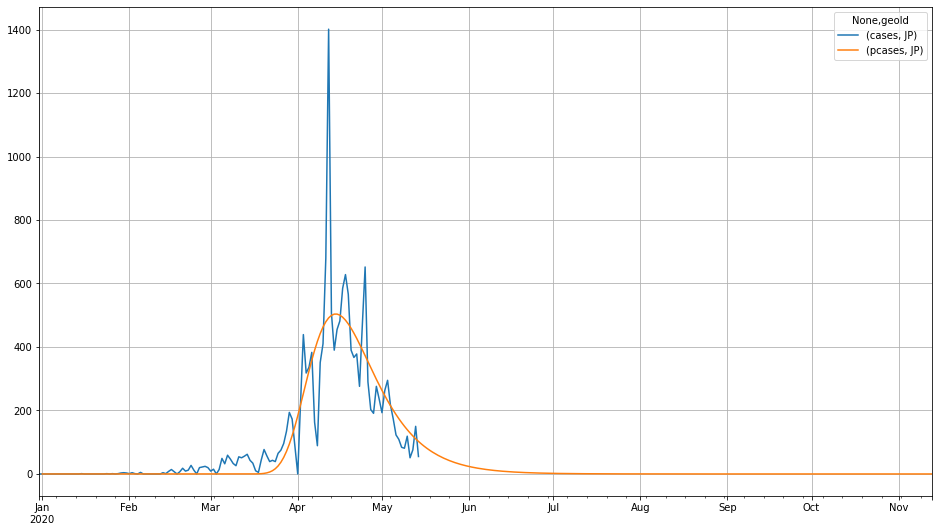

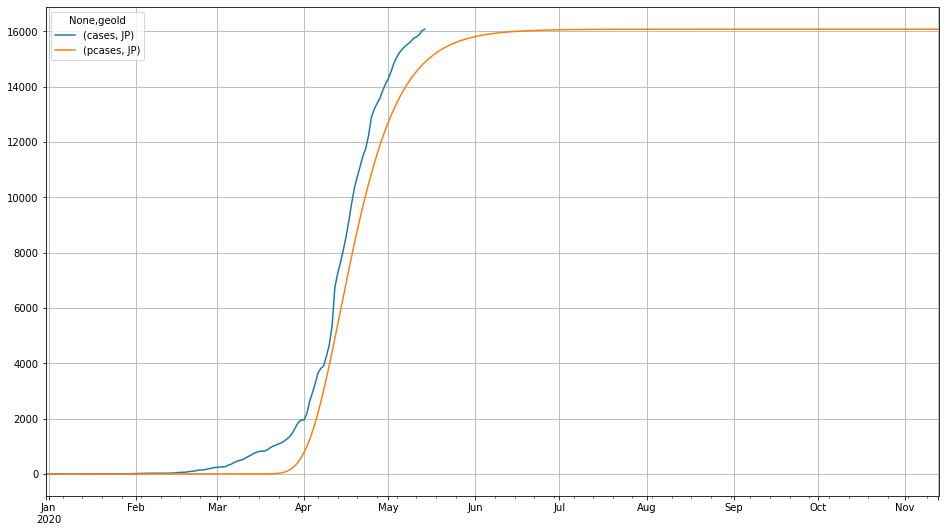

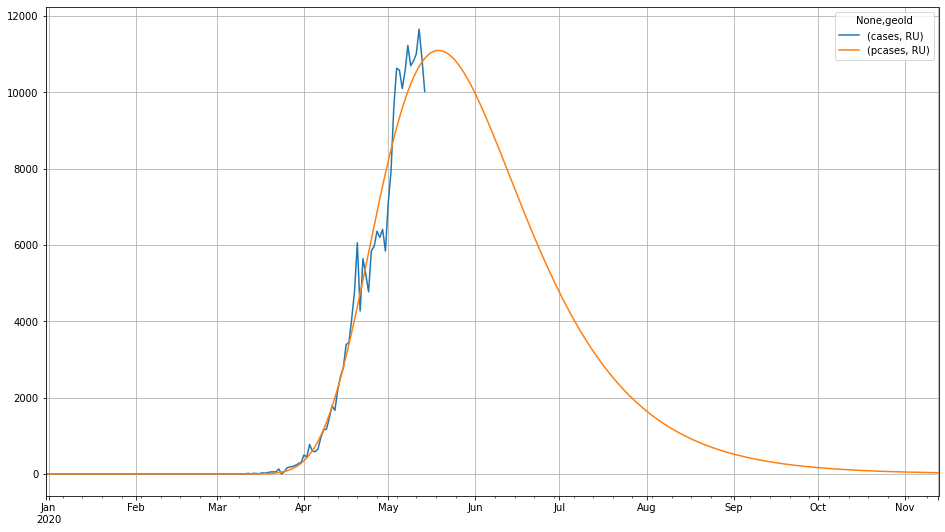

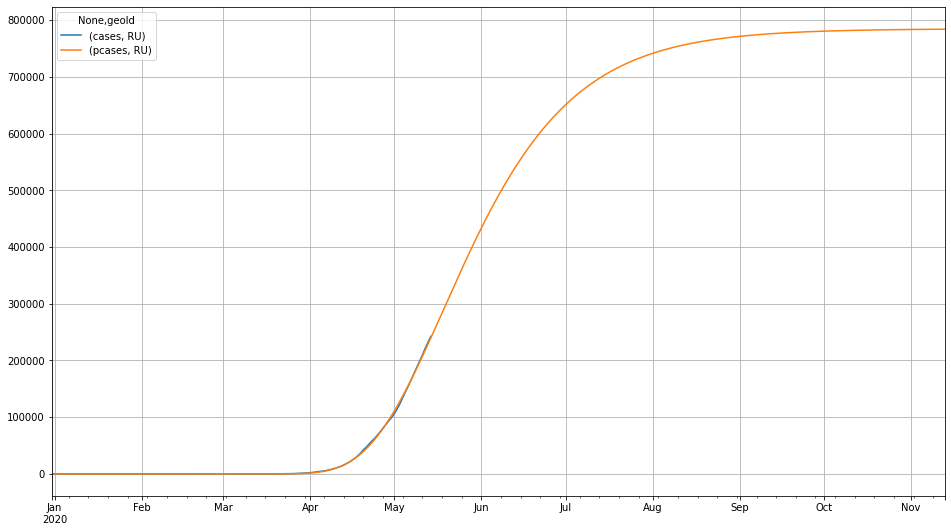

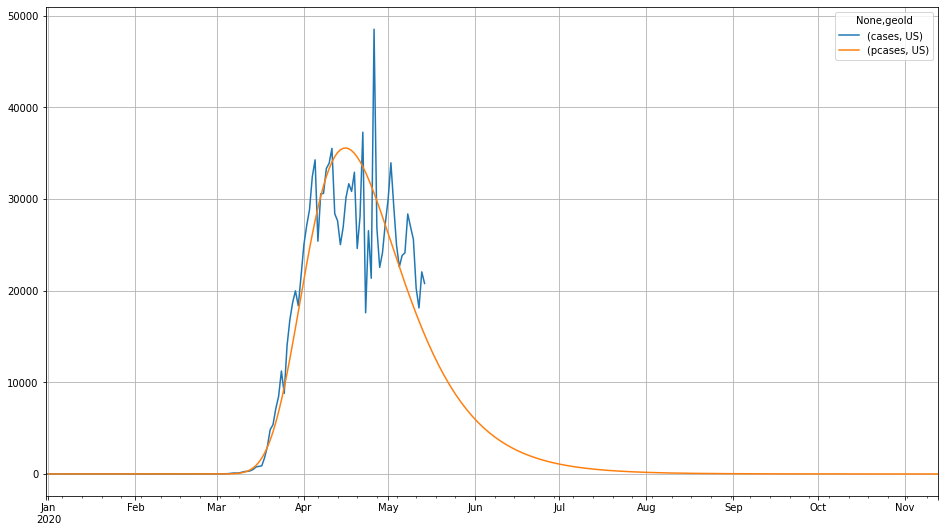

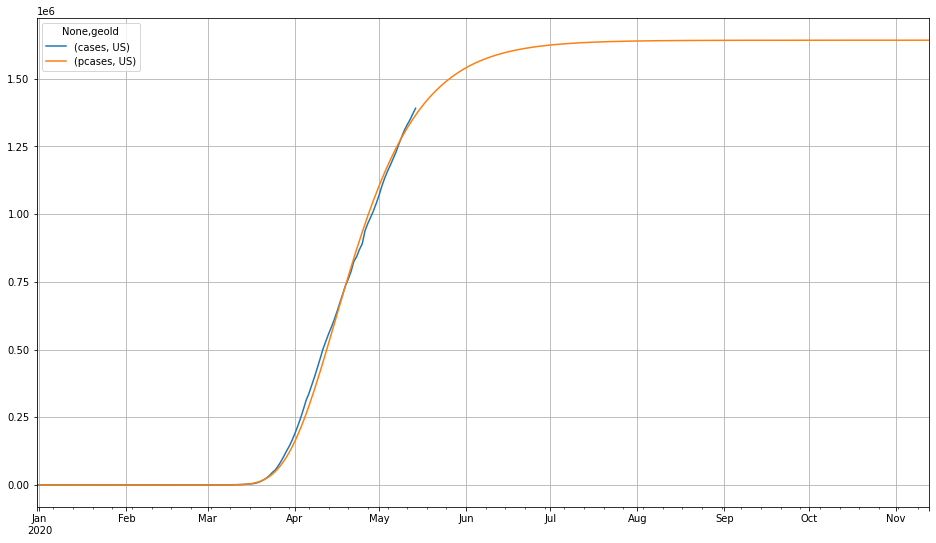

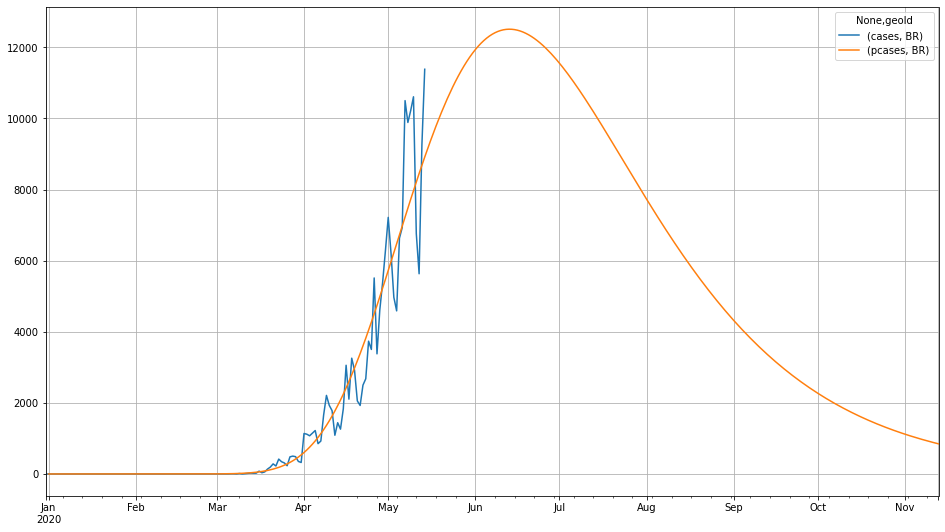

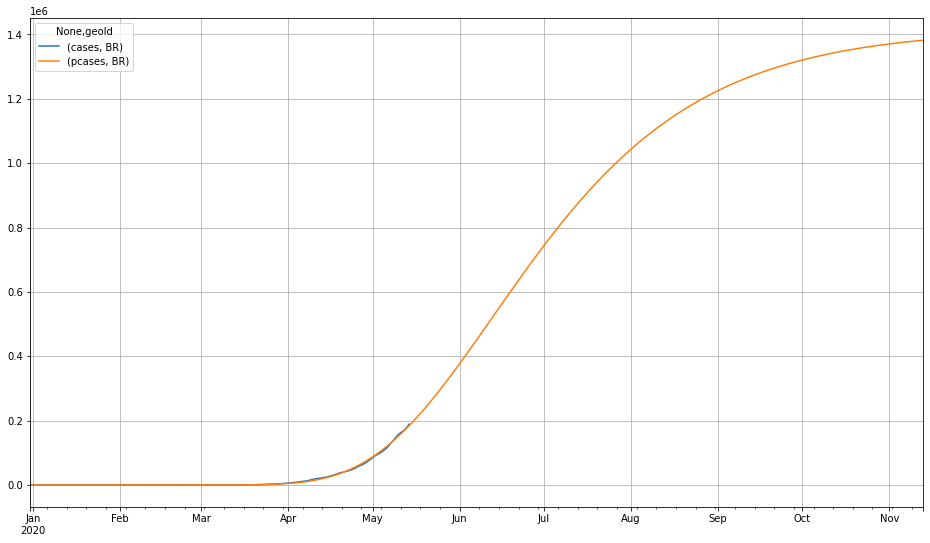

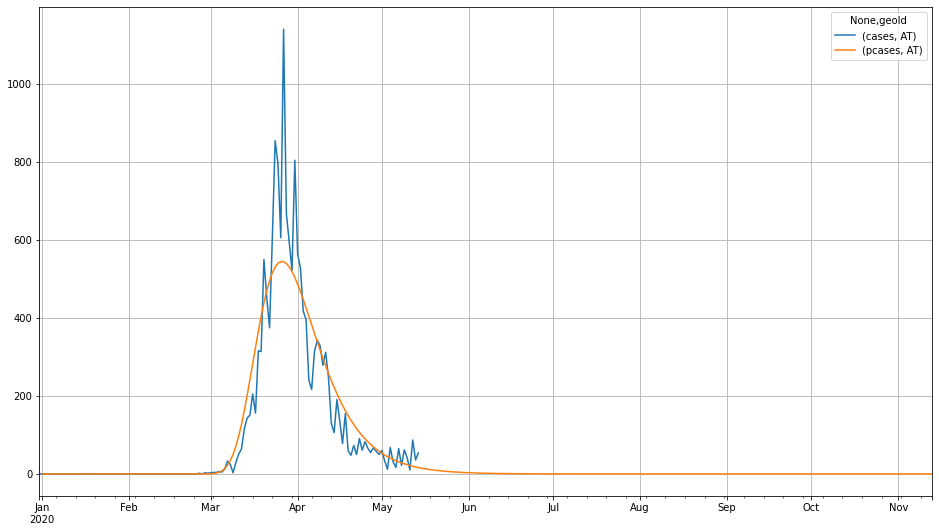

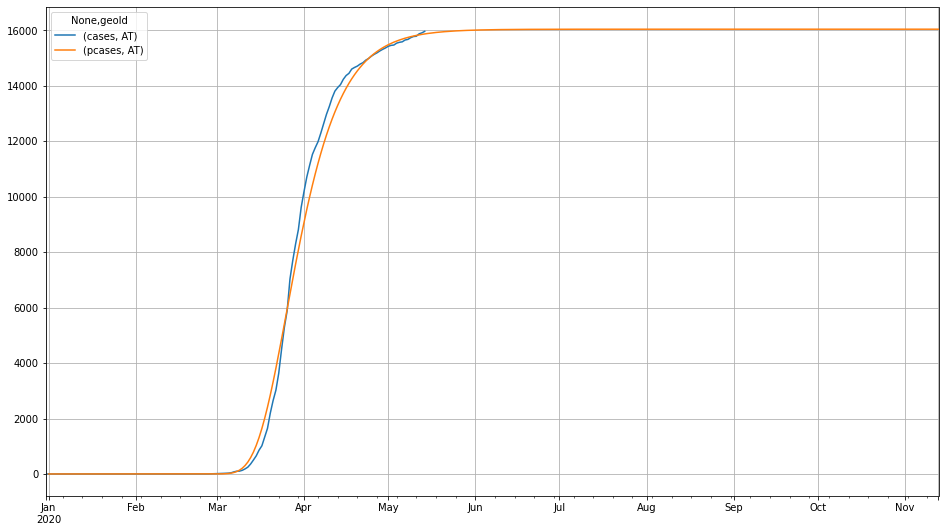

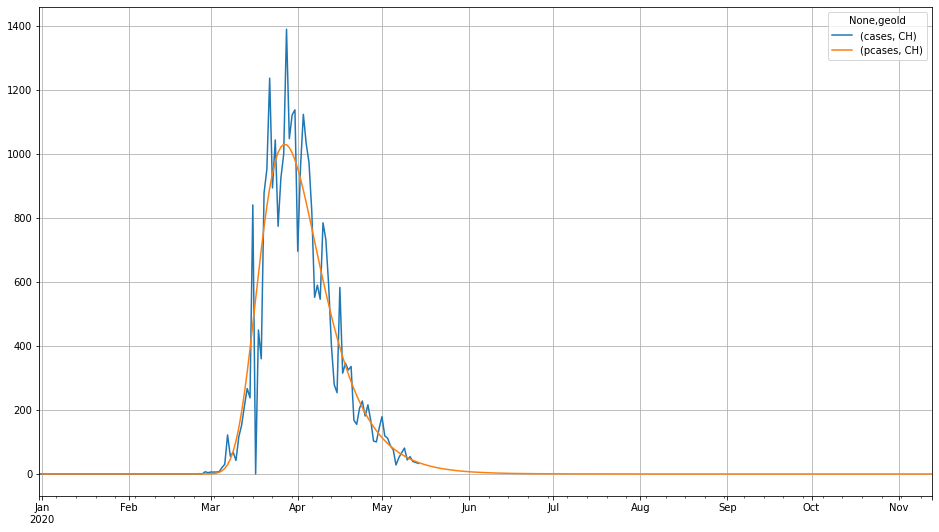

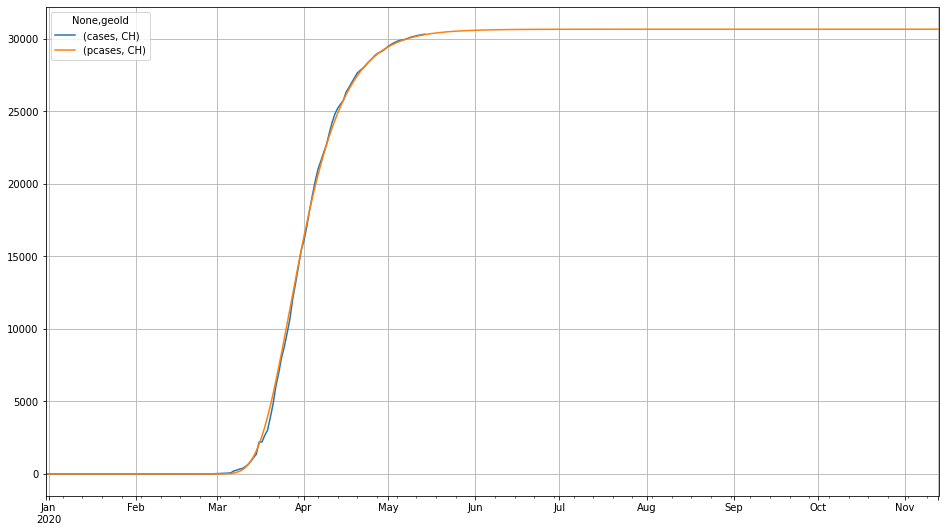

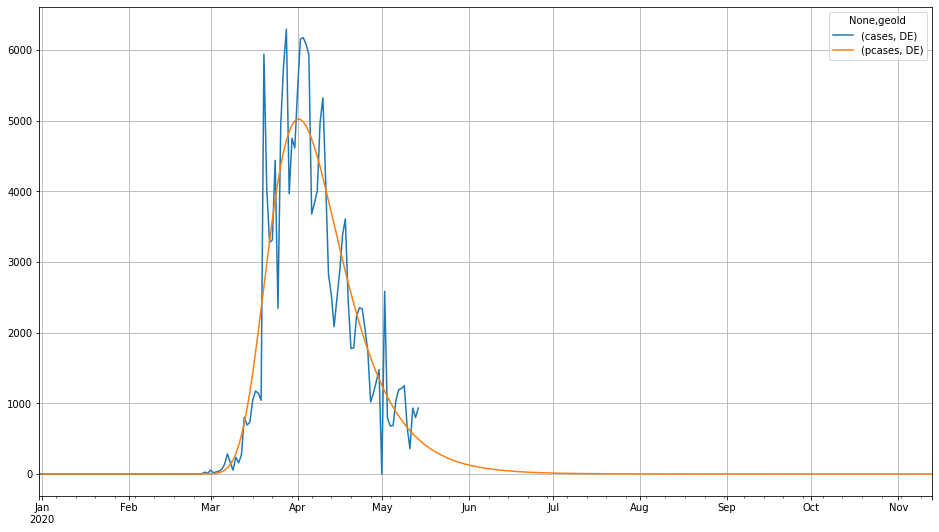

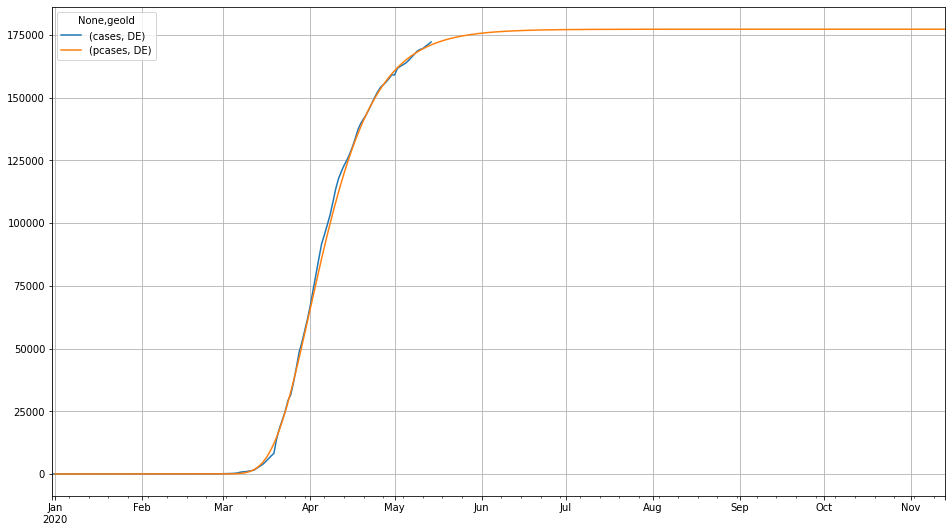

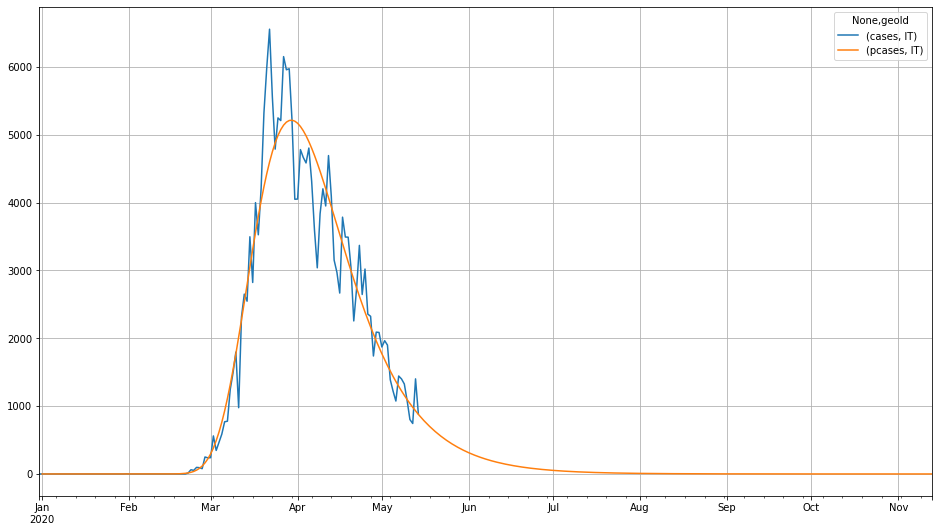

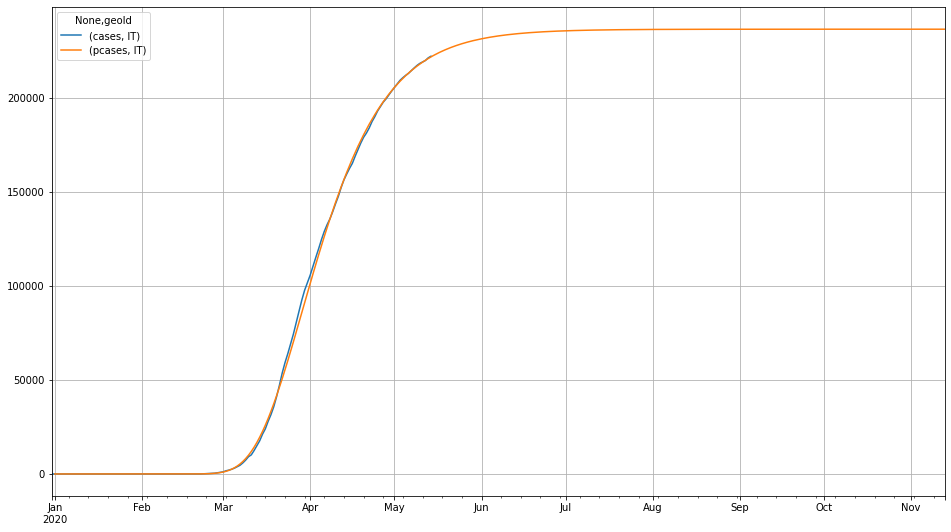

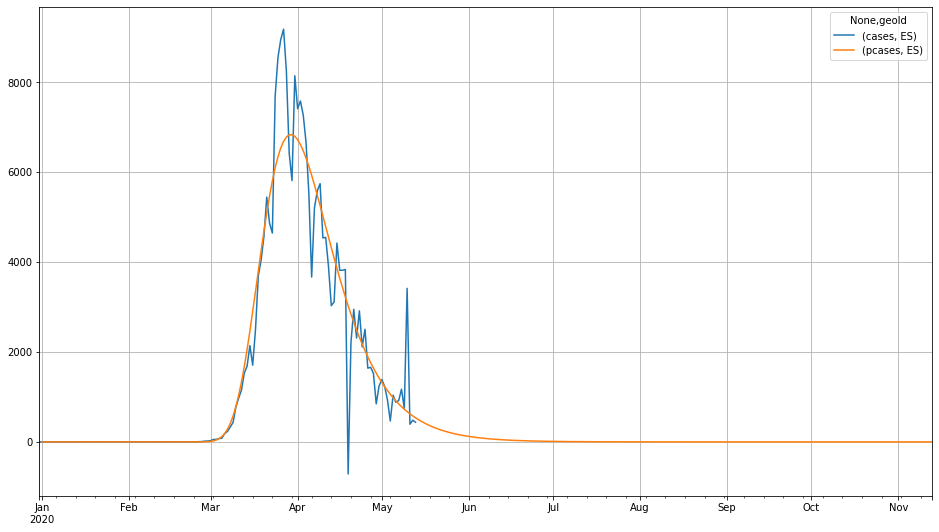

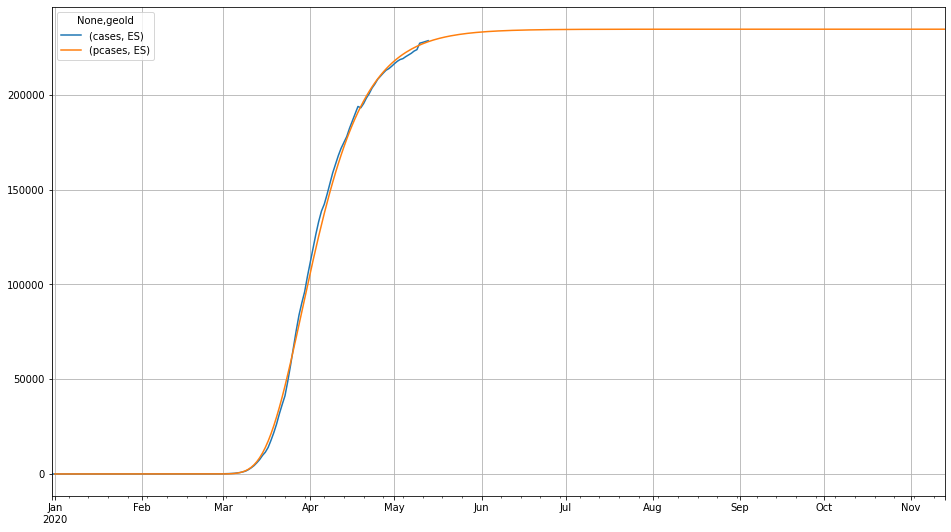

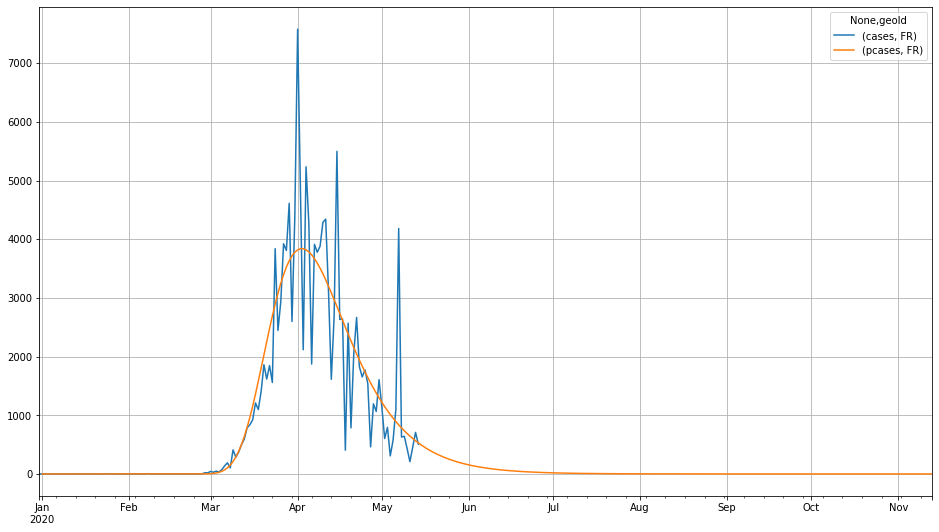

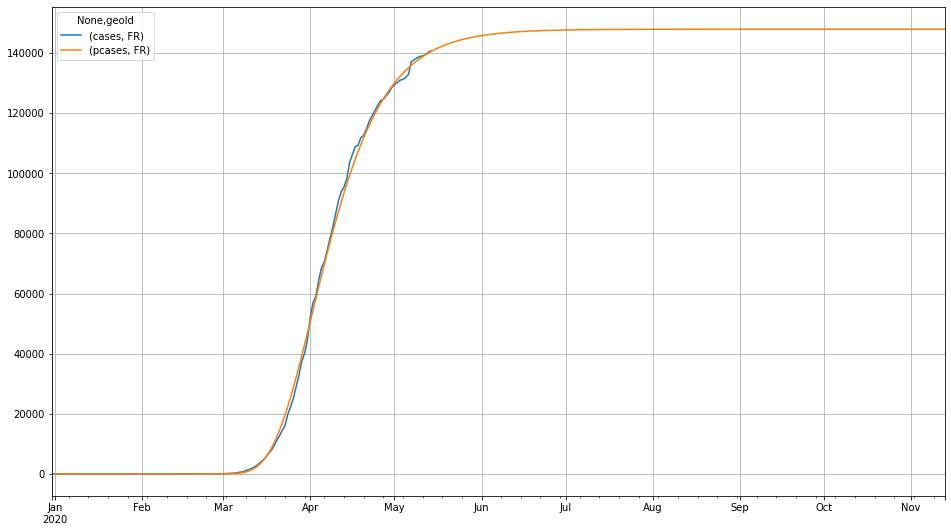

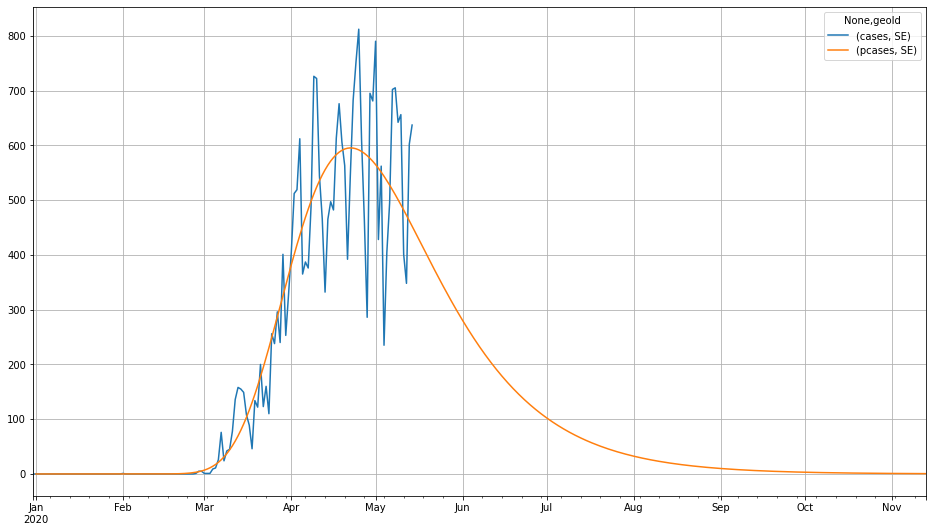

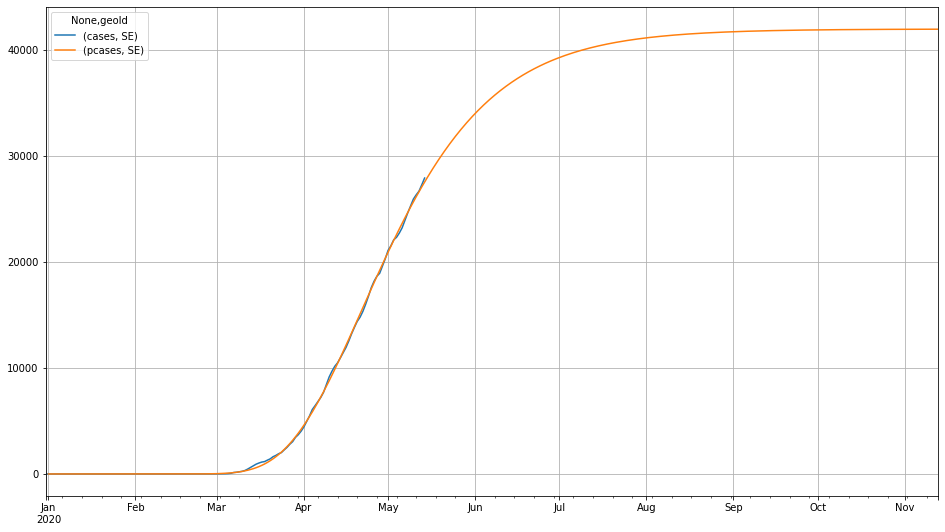

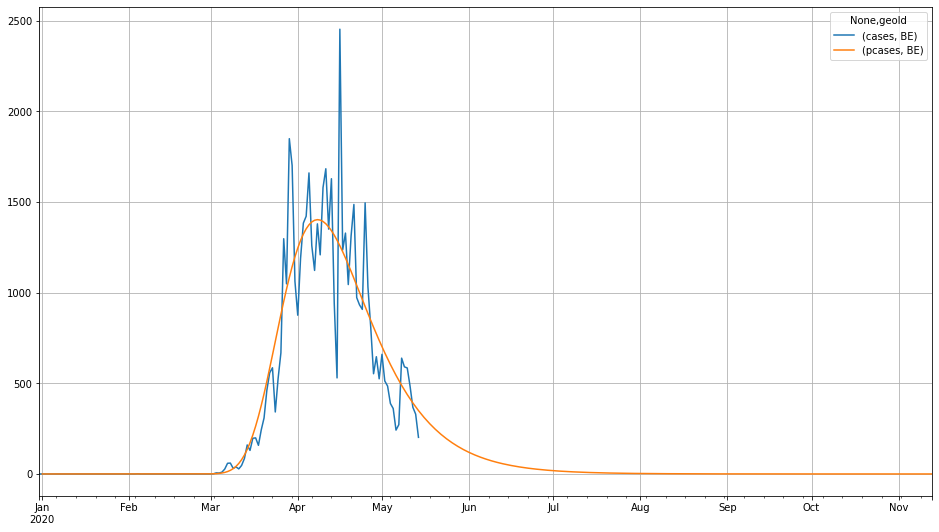

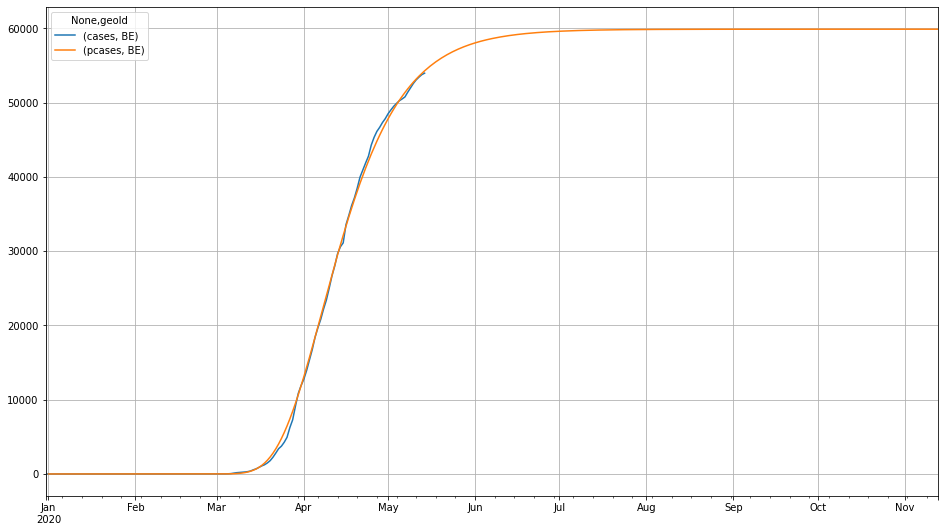

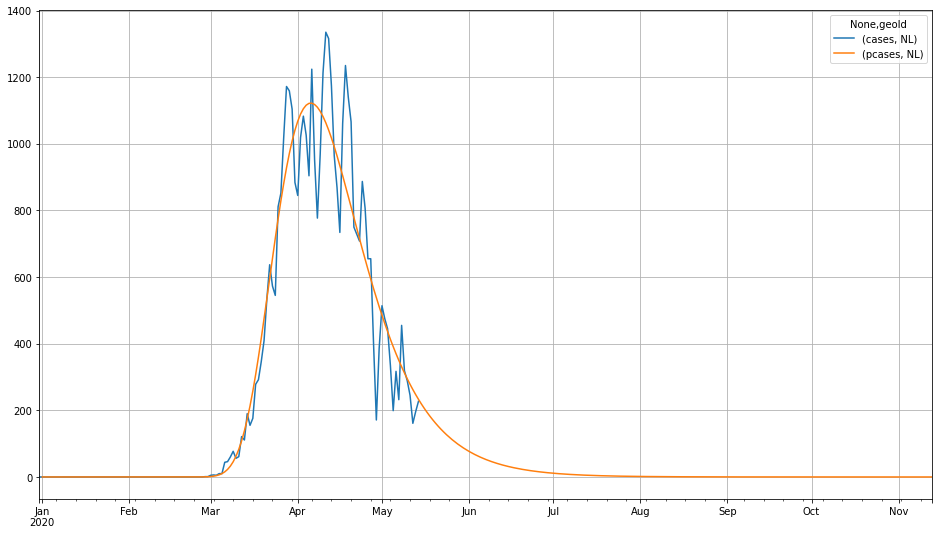

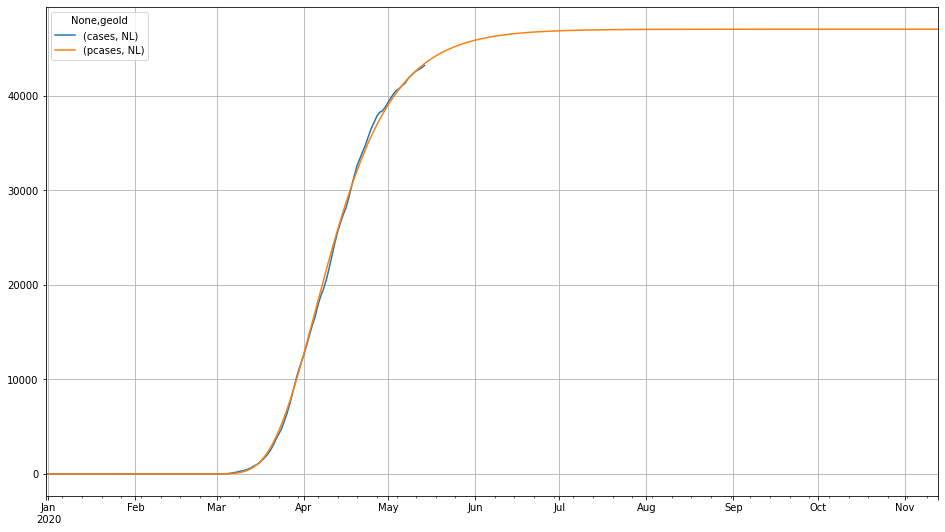

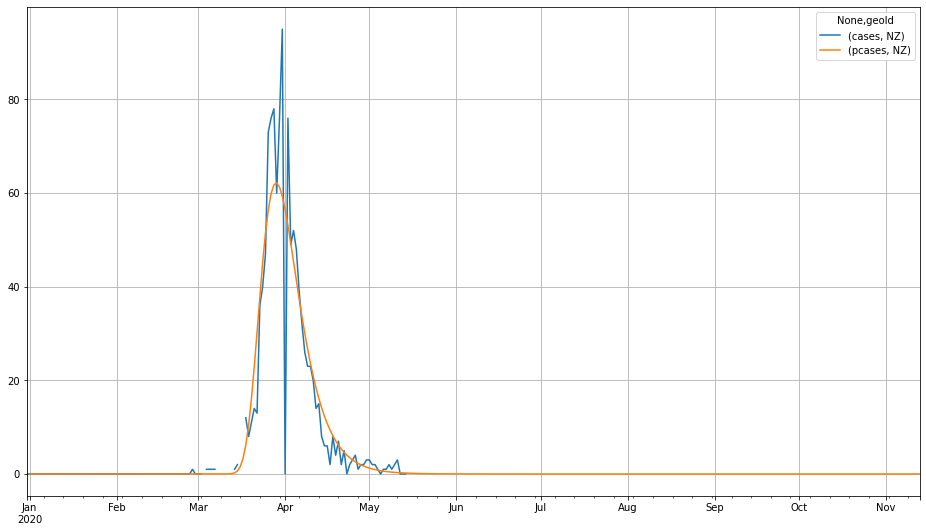

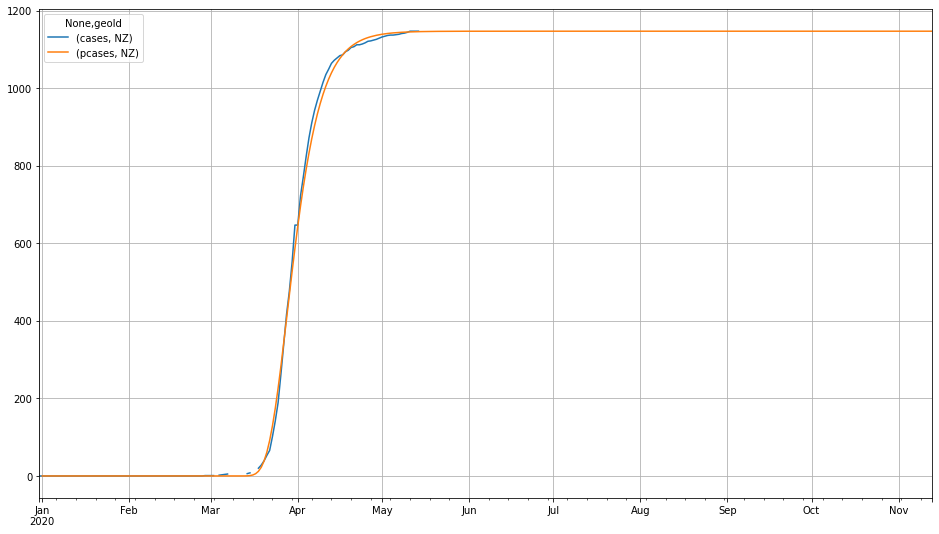

In [22]:
# countries = df['geoId'].unique()

countries = ['JP', 'RU', 'US', 'BR', 'AT', 'CH', 'DE', 'IT', 'ES', 'FR', 'SE', 'BE', 'NL', 'NZ']

measure  = 'cases'
pmeasure = 'pcases'

def calcresd(progress):
    global df_pred, fit
    df_pred['scaled'] = df_pred['cumul'] / maxcases * progress
    df_pred = df_pred[df_pred['scaled'] < 1]
    if len(df_pred) > 4:
        df_pred['linear'] = - np.log(- np.log(df_pred['scaled']))
        fit = np.polyfit(x=df_pred['daynum'], y=df_pred['linear'], deg=1, full=True)
        return(fit[1][0])
    else:
        return 99    

from scipy.optimize import minimize

for country in countries:
    df_pred = pd.DataFrame({'daynum':df_geo['daynum'], measure:df_geo[measure][country]})
    mincases = df[df['geoId'] == country]['popData2018'].iloc[0] / 1e6
    maxcases = df_pred[measure].cumsum().max()
    df_pred = df_pred[df_pred[measure] > mincases]
    if len(df_pred) > 0:
        df_pred['cumul'] = df_pred[measure].cumsum()
        optim = minimize(calcresd, 1, method='SLSQP', bounds=[(0.1, 1)])
        progress = optim.x[0]
        df_geo[(pmeasure, country)] = np.exp(- np.exp(- np.polyval(fit[0], df_geo['daynum']))) * maxcases / progress
        df_geo[(pmeasure, country)] = df_geo[(pmeasure, country)] - df_geo[(pmeasure, country)].shift()
        print(country, "Residuals %1.3f at %3d percent of %7d" %(optim.fun, progress * 100, df_geo[pmeasure][country].cumsum().max()), measure)
        df_geo[[(measure, country), (pmeasure, country)]].plot(figsize=(16, 9), grid=True)
        df_geo[[(measure, country), (pmeasure, country)]].cumsum().plot(figsize=(16, 9), grid=True)

Keep exploring! Stay home, wash your hands, keep your distance.